Based on the code for `./output_investigation_06.ipynb`.
Make four plots
1. Convergence plots of suboptimizations
2. Feasibility criterion
3. Globally averaged weights
4. Monthly weigh maps

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import pickle
from scipy import stats

In [2]:
from generate_opt_objects import A_b_generation

**PNC:/Users/mikestanley/anaconda3/envs/mc_sampling/lib/python3.8/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  pyproj could not be found, so IO/API coordinates cannot be converted to lat/lon; to fix, install pyproj or basemap (e.g., `pip install pyproj)`


In [3]:
# results base directory
BASE_DIR = './data/carbon_flux/results'

# save filepath
SAVE_FIG_BASE = '../figures/interval_optimizations/continental_US_jun2010/dual/07'

In [4]:
# paths
OBS_FP = '../fixed_optimization_inputs/y_affine_corrected.npy'

In [5]:
# get necessary objects
with open(OBS_FP, 'rb') as f:
    y_obs = np.load(f)
    
# gosat data
with open('../fixed_optimization_inputs/gosat_df_jan1_aug31_2010.csv', 'rb') as f:
    gosat_df = pd.read_csv(f)
L_inv_vec = 1 / gosat_df.xco2_unc.values
    
# tranform the data
y_tilde = np.multiply(L_inv_vec, y_obs)

CONSTR_DIR = '/Users/mikestanley/Research/Carbon_Flux/optimization/data/sign_corrected'
A, b = A_b_generation(
    box_constraint_fp=CONSTR_DIR + '/scipy_bnds.pkl'
)

FUNC_FP = '/Users/mikestanley/Research/Carbon_Flux/optimization'
FUNC_FP += '/src_admm/data/carbon_flux/objects/na_june_functional.npy'
with open(FUNC_FP, 'rb') as f:
    h = np.load(f)

In [6]:
# psi_alpha
with open('./data/carbon_flux/objects/opt_res_cont.pkl', 'rb') as f:
    opt_slack = pickle.load(f)
    
PSI_ALPHA = np.sqrt(stats.chi2.ppf(q=.95, df=1) + opt_slack[1])

In [7]:
def f_w(w, y=y_tilde, psi_alpha=PSI_ALPHA, b=b, c=np.zeros_like(b)):
    """ Lower endpoint functional """
    return np.dot(w, y) - psi_alpha * np.linalg.norm(w) - np.dot(b, c)

def f_w_uep(w, y=y_tilde, psi_alpha=PSI_ALPHA, b=b, c=np.zeros_like(b)):
    """ Lower endpoint functional """
    return -np.dot(w, y) + psi_alpha * np.linalg.norm(w) + np.dot(b, c)

# Plotting functions

In [8]:
def global_avg_plot(w_ser, title_str=None, figsize=(8, 5)):
    """
    Globally averaged weights at daily, weekly, and month res
    
    Parameters
    ----------
        w_ser (pandas series) : weights indexed by time
    """
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=figsize)
    ts_day = w_ser.resample('D').mean()
    ts_week = w_ser.resample('W').mean()
    ts_month = w_ser.resample('M').mean()
    ts_day.plot(ax=ax, label='Day')
    ts_week.plot(ax=ax, label='Week')
    ts_month.plot(ax=ax, label='Month')
    ax.axhline(0, linestyle='--', color='gray')
    ax.legend()
    ax.set_title(title_str)
    plt.show()
    
def month_map_plot(df, w_col_str, norm, vmin=None, vmax=None, figsize=(12, 16), save_fp=None):
    """
    Monthly heat maps for the given weights
    
    Parameters
    ----------
        df        (pandas dataframe)  : contains columns - 'month', 'lon', 'lat', and w_col_str
        w_col_str (str)               : name of w column in df to use
        norm      (mcolors.Normalize) : for color scheme
    """
    # w start
    fig, ax = plt.subplots(ncols=2, nrows=4, figsize=figsize)
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

    for i in range(8):
        row_idx = i // 2
        col_idx = i % 2
        month_idxs = df['month'].astype(int) == i + 1
        sp_i = ax[row_idx, col_idx].scatter(
            df['lon'][month_idxs], df['lat'][month_idxs],
            c=df[w_col_str][month_idxs],
            norm=norm, vmin=vmin, vmax=vmax,
            s=14, cmap='seismic'
        )
        ax[row_idx, col_idx].set_title(months[i])

    plt.colorbar(sp_i,ax=ax[0, 0])
    if save_fp:
        plt.savefig(save_fp, dpi=300)
        plt.close()
    else:
        plt.show()

# Optimization Diagnostics

#### Convergence plots

In [9]:
# read in the raw stdout file
with open(BASE_DIR + '/07/stdout_it0.txt', 'r') as f:
    stdout0_raw = f.readlines()

In [10]:
# isolate the trajectories from the w optimization
all_obj_vals = [float(line[22:34].replace('D', 'e')) for line in stdout0_raw if 'At iterate' in line]
traj_w_01 = all_obj_vals[:13]
traj_c_01 = all_obj_vals[13:16]
traj_w_02 = all_obj_vals[16:29]
traj_c_02 = all_obj_vals[29:32]
traj_w_03 = all_obj_vals[32:45]
traj_c_03 = all_obj_vals[45:48]
traj_w_04 = all_obj_vals[48:61]
traj_c_04 = all_obj_vals[61:64]
traj_w_05 = all_obj_vals[64:77]
traj_c_05 = all_obj_vals[77:80]
traj_w_06 = all_obj_vals[80:93]
traj_c_06 = all_obj_vals[93:96]
traj_w_07 = all_obj_vals[96:109]
traj_c_07 = all_obj_vals[109:112]
traj_w_08 = all_obj_vals[112:125]
traj_c_08 = all_obj_vals[125:128]
traj_w_09 = all_obj_vals[128:141]
traj_c_09 = all_obj_vals[141:144]
traj_w_10 = all_obj_vals[144:157]
traj_c_10 = all_obj_vals[157:]

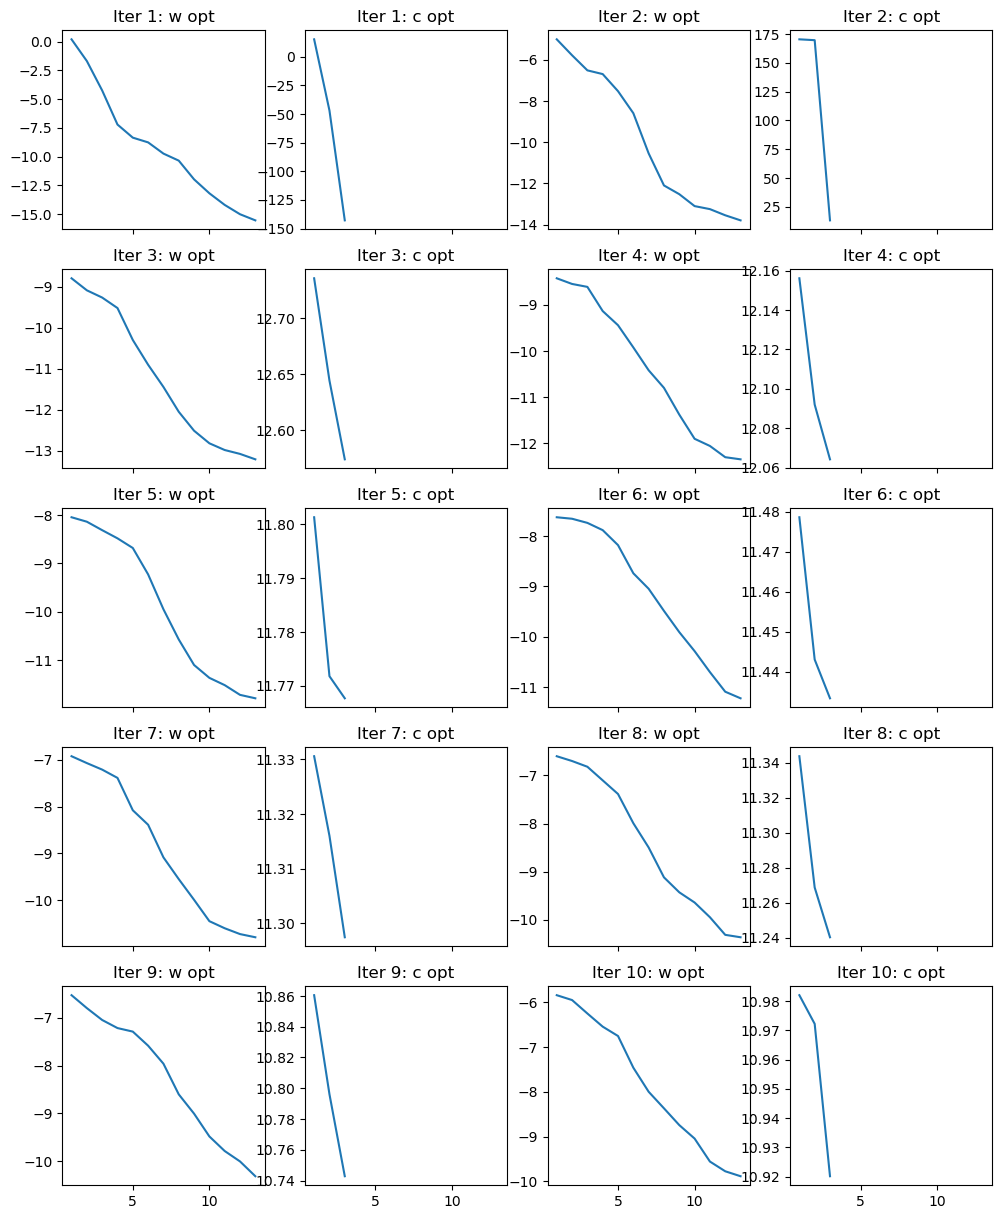

In [11]:
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(12, 15), sharex=True)

# iteration 1
ax[0, 0].plot(np.arange(1, len(traj_w_01) + 1), traj_w_01)
ax[0, 1].plot(np.arange(1, len(traj_c_01) + 1), traj_c_01)

# iteration 2
ax[0, 2].plot(np.arange(1, len(traj_w_02) + 1), traj_w_02)
ax[0, 3].plot(np.arange(1, len(traj_c_02) + 1), traj_c_02)

# iteration 3
ax[1, 0].plot(np.arange(1, len(traj_w_03) + 1), traj_w_03)
ax[1, 1].plot(np.arange(1, len(traj_c_03) + 1), traj_c_03)

# iteration 4
ax[1, 2].plot(np.arange(1, len(traj_w_04) + 1), traj_w_04)
ax[1, 3].plot(np.arange(1, len(traj_c_04) + 1), traj_c_04)

# iteration 5
ax[2, 0].plot(np.arange(1, len(traj_w_05) + 1), traj_w_05)
ax[2, 1].plot(np.arange(1, len(traj_c_05) + 1), traj_c_05)

# iteration 6
ax[2, 2].plot(np.arange(1, len(traj_w_06) + 1), traj_w_06)
ax[2, 3].plot(np.arange(1, len(traj_c_06) + 1), traj_c_06)

# iteration 7
ax[3, 0].plot(np.arange(1, len(traj_w_07) + 1), traj_w_07)
ax[3, 1].plot(np.arange(1, len(traj_c_07) + 1), traj_c_07)

# iteration 8
ax[3, 2].plot(np.arange(1, len(traj_w_08) + 1), traj_w_08)
ax[3, 3].plot(np.arange(1, len(traj_c_08) + 1), traj_c_08)

# iteration 9
ax[4, 0].plot(np.arange(1, len(traj_w_09) + 1), traj_w_09)
ax[4, 1].plot(np.arange(1, len(traj_c_09) + 1), traj_c_09)

# iteration 10
ax[4, 2].plot(np.arange(1, len(traj_w_10) + 1), traj_w_10)
ax[4, 3].plot(np.arange(1, len(traj_c_10) + 1), traj_c_10)


# labels
ax[0, 0].set_title('Iter 1: w opt')
ax[0, 1].set_title('Iter 1: c opt')
ax[0, 2].set_title('Iter 2: w opt')
ax[0, 3].set_title('Iter 2: c opt')
ax[1, 0].set_title('Iter 3: w opt')
ax[1, 1].set_title('Iter 3: c opt')
ax[1, 2].set_title('Iter 4: w opt')
ax[1, 3].set_title('Iter 4: c opt')
ax[2, 0].set_title('Iter 5: w opt')
ax[2, 1].set_title('Iter 5: c opt')
ax[2, 2].set_title('Iter 6: w opt')
ax[2, 3].set_title('Iter 6: c opt')
ax[3, 0].set_title('Iter 7: w opt')
ax[3, 1].set_title('Iter 7: c opt')
ax[3, 2].set_title('Iter 8: w opt')
ax[3, 3].set_title('Iter 8: c opt')
ax[4, 0].set_title('Iter 9: w opt')
ax[4, 1].set_title('Iter 9: c opt')
ax[4, 2].set_title('Iter 10: w opt')
ax[4, 3].set_title('Iter 10: c opt')

plt.show()

#### Final results

In [12]:
with open(BASE_DIR + '/07/final_results.pkl', 'rb') as f:
    final_res = pickle.load(f)

In [13]:
final_res

{'objective_evals': [315.5192718116851,
  -0.6587854750496693,
  -1.6846808160599314,
  -1.7519355561213081,
  -2.172574801052637,
  -2.4660557831408183,
  -2.4958516462120226,
  -2.932849301151934,
  -3.0774247370499244,
  -3.38651783427446],
 'w_opt_output': {'vectors': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -4.06091535e-04, -4.95763707e-04,  2.19275232e-03],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -1.67662458e-05, -1.03088897e-05,  3.16697738e-03],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           2.19151189e-05,  6.46205026e-05,  3.50389631e-03],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           1.15980771e-04,  1.97140035e-04,  4.20763632e-03],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           1.31932476e-04,  2.14734866e-04,  4.08135722e-03],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         

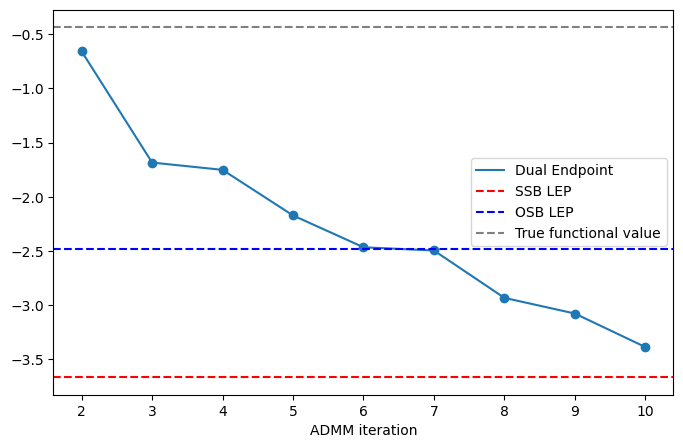

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 11), final_res['objective_evals'][1:], label='Dual Endpoint')
plt.scatter(np.arange(2, 11), final_res['objective_evals'][1:])
plt.axhline(-3.665, linestyle='--', label='SSB LEP', color='red')
plt.axhline(-2.478, linestyle='--', label='OSB LEP', color='blue')
plt.axhline(-0.436, linestyle='--', label='True functional value', color='gray')
plt.legend()
plt.xlabel('ADMM iteration')
plt.show()

In [15]:
# get feasibility values for other iterations
for i in range(0, 10):
    feas_i = np.linalg.norm(h + A.T @ final_res['c_opt_output']['vectors'][i] - final_res['KTw_vecs'][i])
    print(f'Iteration {i}: {feas_i}')

Iteration 0: 0.566651179036465
Iteration 1: 0.04437046360454102
Iteration 2: 0.029103589192921015
Iteration 3: 0.02565878833999412
Iteration 4: 0.02104184847626049
Iteration 5: 0.022147922275159507
Iteration 6: 0.023336627071259244
Iteration 7: 0.023307305256080074
Iteration 8: 0.02758509747570322
Iteration 9: 0.024063597980833674


# Weight plots

In [20]:
# read in the starting w used
with open('./data/carbon_flux/results/07/intermediate_starts/w_start_it0.npy', 'rb') as f:
    w_start = np.load(file=f)

In [22]:
# add columns to the gosat dataframe
gosat_df['w_start'] = w_start

LAST_IDX = 9
for i in range(LAST_IDX):
    
    # weights
    gosat_df[f'w_admm{i}'] = final_res['w_opt_output']['vectors'][i]
    
    # w y prods
    gosat_df[f'w_y_prods{i}'] = gosat_df[f'w_admm{i}'] * y_tilde

In [23]:
# create a datetime column for the observations
gosat_df['time'] = gosat_df.apply(
    lambda x: pd.to_datetime(f"{int(x['day'])}/{int(x['month'])}/{int(x['year'])}", format="%d/%m/%Y"),
    axis=1
)

# set the above as the index
gosat_df.set_index('time', inplace=True)

#### Global Average Weights

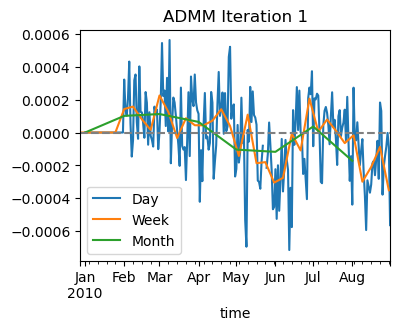

In [23]:
global_avg_plot(w_ser=gosat_df['w_admm0'], title_str=r'ADMM Iteration 1', figsize=(4, 3))

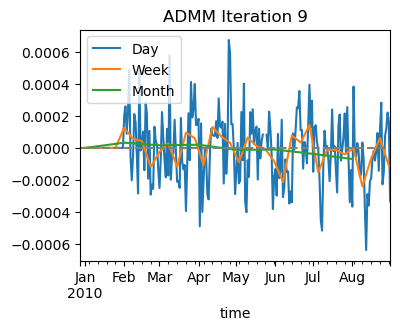

In [21]:
IDX = 8
global_avg_plot(w_ser=gosat_df[f'w_admm{IDX}'], title_str=f'ADMM Iteration {IDX + 1}', figsize=(4, 3))

#### Heat maps

In [24]:
# define a color scheme
norm_start = mcolors.Normalize(
    vmin=gosat_df['w_start'].min(),
    vmax=gosat_df['w_start'].max(),
)
norm = mcolors.Normalize(
    vmin=gosat_df[['w_start', 'w_admm0']].values.flatten().min(),
    vmax=gosat_df[['w_start', 'w_admm0']].values.flatten().max(),
)

In [25]:
# product maps
for i in range(9):
    SAVE_FP = SAVE_FIG_BASE + '/w_y_prods%s.png' % str(i).zfill(2)
    month_map_plot(
        df=gosat_df, w_col_str=f'w_y_prods{i}', norm=None, vmin=-0.06, vmax=0.06,
        save_fp=SAVE_FP
    )

In [26]:
# heat map of start
SAVE_FP = SAVE_FIG_BASE + '/w_start.png'
month_map_plot(
    df=gosat_df, w_col_str='w_start', norm=None, vmin=-0.001, vmax=0.001,
    save_fp=SAVE_FP
)

In [26]:
# after current ADMM iterations
for i in range(9):
    SAVE_FP = SAVE_FIG_BASE + '/w_admm%s.png' % str(i).zfill(2)
    month_map_plot(
        df=gosat_df, w_col_str=f'w_admm{i}', norm=None, vmin=-0.01, vmax=0.01,
        save_fp=SAVE_FP
    )

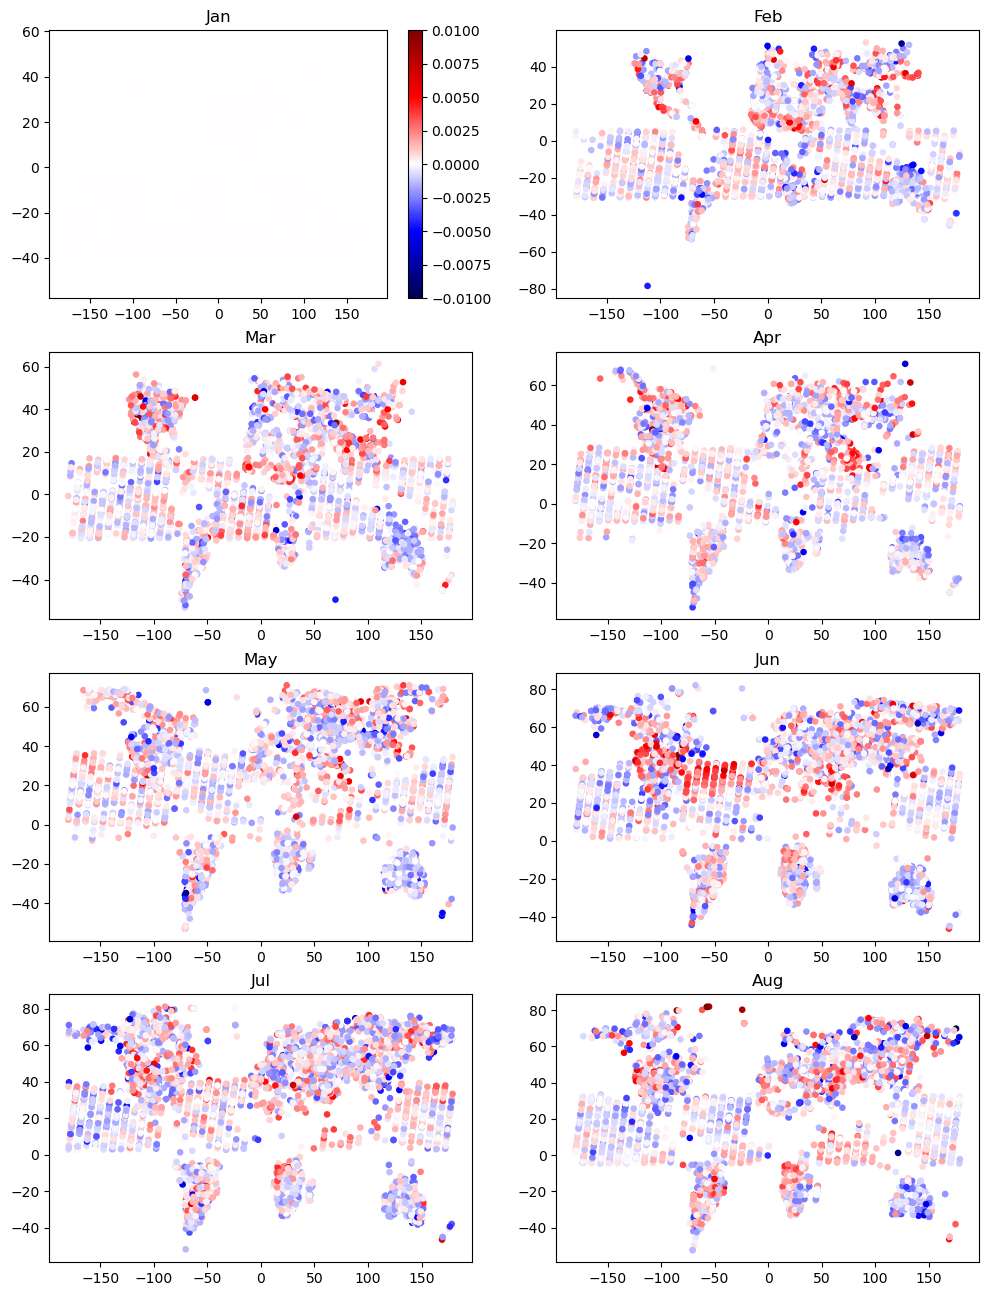

In [ ]:
# IDX-th ADMM iteration
IDX = 3
SAVE_FP = SAVE_FIG_BASE + f'/w_admm{IDX}.png'
month_map_plot(
    df=gosat_df, w_col_str=f'w_admm{IDX}', norm=None, vmin=-0.01, vmax=0.01,
    save_fp=SAVE_FP
)

#### Latitude Means

In [28]:
month_lat_ma = {}
MA_HF = 50
MA_LF = 200
IDX = 8  # change this to look at desired iteration
for i in range(1, 9):
    
    # find the month of interest
    month_mask = gosat_df.month == i
    
    # rolling average based on latitude
    month_lat_ma[i] = {
        MA_HF: gosat_df.loc[month_mask].sort_values('lat')[f'w_admm{IDX}'].rolling(MA_HF).mean().dropna(),
        MA_LF: gosat_df.loc[month_mask].sort_values('lat')[f'w_admm{IDX}'].rolling(MA_LF).mean().dropna(),
    }

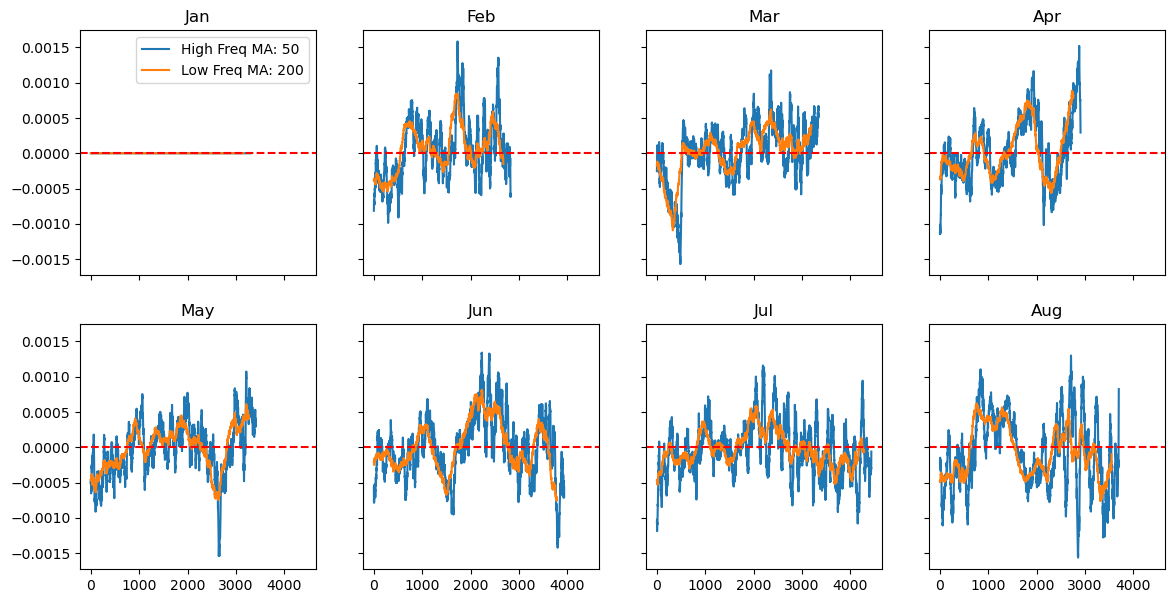

In [29]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(14, 7), sharex=True, sharey=True)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
for i in range(8):

    label_hf = f'High Freq MA: {MA_HF}' if i == 0 else None
    label_lf = f'Low Freq MA: {MA_LF}' if i == 0 else None
    
    ax[i//4, i % 4].plot(month_lat_ma[i + 1][MA_HF].values, label=label_hf)
    ax[i//4, i % 4].plot(month_lat_ma[i + 1][MA_LF].values, label=label_lf)
    ax[i//4, i % 4].axhline(0, linestyle='--', color='red')
    ax[i//4, i % 4].set_title(months[i])

ax[0, 0].legend()
    
plt.show()

##### Looking at the product

In [30]:
month_lat_ma_prod = {}
MA_HF = 50
MA_LF = 200
IDX = 8
for i in range(1, 9):
    
    # find the month of interest
    month_mask = gosat_df.month == i
    
    # rolling average based on latitude
    month_lat_ma_prod[i] = {
        MA_HF: gosat_df.loc[month_mask].sort_values('lat')[f'w_y_prods{IDX}'].rolling(MA_HF).mean().dropna(),
        MA_LF: gosat_df.loc[month_mask].sort_values('lat')[f'w_y_prods{IDX}'].rolling(MA_LF).mean().dropna(),
    }

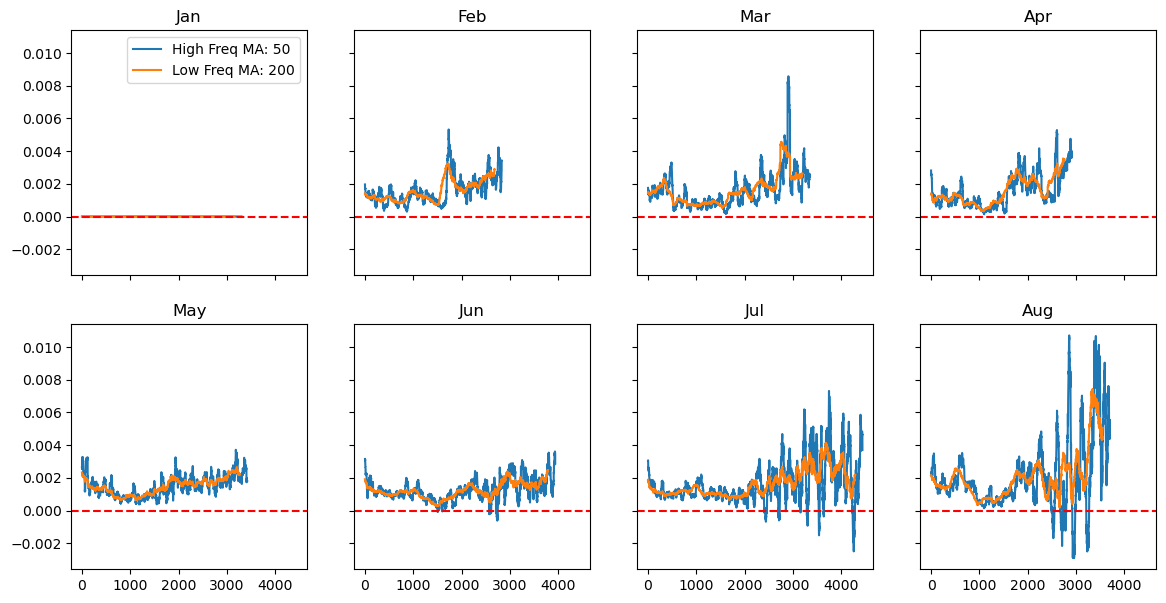

In [31]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(14, 7), sharex=True, sharey=True)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
for i in range(8):

    label_hf = f'High Freq MA: {MA_HF}' if i == 0 else None
    label_lf = f'Low Freq MA: {MA_LF}' if i == 0 else None
    
    ax[i//4, i % 4].plot(month_lat_ma_prod[i + 1][MA_HF].values, label=label_hf)
    ax[i//4, i % 4].plot(month_lat_ma_prod[i + 1][MA_LF].values, label=label_lf)
    ax[i//4, i % 4].axhline(0, linestyle='--', color='red')
    ax[i//4, i % 4].set_title(months[i])

ax[0, 0].legend()
    
plt.show()

# Create other objects

In [11]:
SAVE_BASE = '/Users/mikestanley/Research/Carbon_Flux/optimization/src_admm'
SAVE_BASE += '/data/carbon_flux/results/07/intermediate_starts'

#### January Mask

In [10]:
# create the boolean mask
jan_mask = (gosat_df.month == 1).values

In [12]:
# save the above
with open(SAVE_BASE + '/january_mask.npy', 'wb') as f:
    np.save(file=f, arr=jan_mask)

# Final Diagnostics

#### Optimality

I.e., we consider
\begin{equation}
\nabla_w \mathcal{L}(w, c, \lambda) = -y + \psi_\alpha \frac{w}{\lVert w \rVert_2} - K \lambda.
\end{equation}

If we are at an optimal point, this should be zero.

In [18]:
# create the input for the forward model
with open('./data/carbon_flux/objects/lambda_07.npy', 'wb') as f:
    np.save(file=f, arr=final_res['lambda_opt_output']['vectors'][9])